<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание по статистическому анализу на python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics
from sklearn import preprocessing
import seaborn as sns

Загрузить датасет по url:


In [3]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [4]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


## Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

In [5]:
def _get_hist(cl_nm):
 plt.hist(df['Freedom'], 200, facecolor='g')
 plt.ylabel('freq')
 plt.xlabel('value')
 plt.title('Частотный график ' + cl_nm)
 plt.grid(True)
 plt.show()

C:\Anaconda\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Anaconda\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


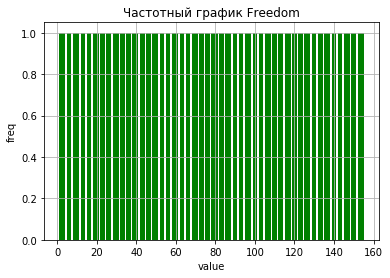

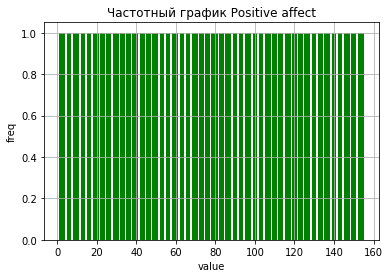

In [6]:
## распределение равномерное
_get_hist('Freedom')
_get_hist('Positive affect')

## Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [7]:
def _get_stats(ser):
    print('Медиана:', statistics.median(ser))
    try:
        print('Мода:', statistics.mode(ser))
    except Exception as e:
        print('Мода:', e)
    print("Стандартное отклонение", statistics.pstdev(ser))
    print("Дисперсия", statistics.pvariance(ser))
    print("Min:", min(ser))
    print("Max:", max(ser))
    print("Выбросы, отсутствующие значения:", freedom.isnull().sum())
    print("Размах:", max(ser) - min(ser))

In [8]:
freedom = df['Freedom']
posit_aff = df['Positive affect']
## уберем значения NaN для расчета ст. отклонения и дисперсии
fr = freedom[freedom > 0]
_get_stats(fr)

Медиана: 78.0
Мода: no unique mode; found 155 equally common values
Стандартное отклонение 44.74371464239419
Дисперсия 2002.0
Min: 1.0
Max: 155.0
Выбросы, отсутствующие значения: 1
Размах: 154.0


## Почему нельзя найти моду?

In [0]:
## все значения - уникальные

## Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

In [9]:
def _check_corr(vl1, vl2):
    print('*'*70)
    print('График корреляции между ' + vl1 + ' и ' + vl2)
    fig, ax = plt.subplots()
    ax.scatter(df[vl1], df[vl2], marker='.')
    ax.grid(True)
    plt.xlabel(vl1)
    plt.ylabel(vl2)
    plt.show()
    print()
    print('*'*70)
    print('Коэффициент Пирсона между ' + vl1 + ' и ' + vl2)
    df_p = df[{vl1, vl2}]
    print(df_p.corr(method='pearson'))

**********************************************************************
График корреляции между Freedom и Positive affect


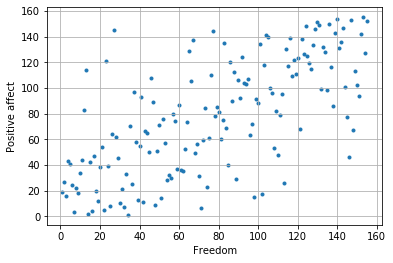


**********************************************************************
Коэффициент Пирсона между Freedom и Positive affect
                 Positive affect  Freedom
Positive affect          1.00000  0.68177
Freedom                  0.68177  1.00000


In [10]:
## положительный знак корреляции указывает на наличие прямой зависимости - при увеличении одного значения, другое также увеличивается
_check_corr('Freedom', 'Positive affect')

## Нормализовать данные колонки Freedom (централизация + масштабирование)

In [11]:
def _get_normalize():
    fr_1 = fr - statistics.mean(fr)
    min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
    fr_2 = min_max_scaler.fit_transform(np.array(fr_1).reshape(-1, 1))
    print(min(fr_2))
    print(max(fr_2))

In [12]:
_get_normalize()

[-1.]
[1.]


## Построить матрицу корреляций для всех колонок таблицы

In [13]:
def _get_correl_matrix(dfr):
    sns.heatmap(dfr.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
    fig=plt.gcf()
    fig.set_size_inches(12,12)
    plt.show()

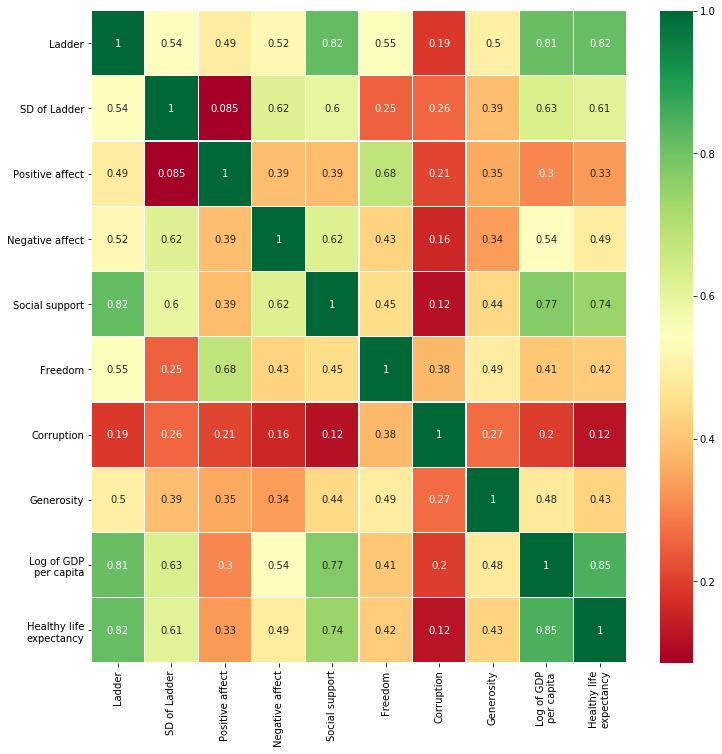

In [14]:
_get_correl_matrix(df)

В данном датасете некоторые атрибуты значительно коррелируют. Какие? Почему?

In [ ]:
#В значительной степени коррелируют социально-экономически значимые атрибуры с индексом удовлетворенности жизнью.
#Атрибуты связаны между собой и Ladder
#- Социальная поддержка (Social support)
#- Доля ВВП на душу населения (Log of GDP per capita)
#- Ожидаемая продолжительность здоровой жизни (Healthy life expectancу)

Загрузить таблицу цен на авокадо: 

In [2]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


## Сделать частотный график колонки AveragePrice. Какое это распределение?

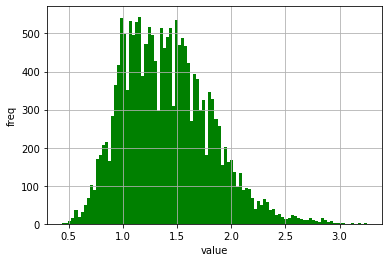

In [3]:
## распределение похоже на биномиальное

avg_price = df['AveragePrice']
plt.hist(avg_price, 100, facecolor='g')
plt.ylabel('freq')
plt.xlabel('value')
plt.grid(True)
plt.show()

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

In [4]:
## корреляция обратная. Средняя стоимость товара увеличивается при сокращении количества товара
## наибольшее, но не критически значетельное влияние на стоимость оказывает товар с кодом 4046
## товары 4770, 4225 оказывают практически одинаковое влияние на стоимость
df_a = df[{'4046', '4225', '4770', 'AveragePrice'}]
df_a.corr(method='pearson')

,4046,4770,AveragePrice,4225
4046,1.000000,0.833389,-0.208317,0.926110
4770,0.833389,1.000000,-0.179446,0.887855
AveragePrice,-0.208317,-0.179446,1.000000,-0.172928
4225,0.926110,0.887855,-0.172928,1.000000


## Написать временные предсказания цен на авокадо типа organic для выбранного региона: LasVegas, начиная с августа 2017 года до конца марта 2018. В качестве тренировочных данных использовать данные до июля 2017 года включительно.
В качестве примера использовать лекционный материал в lecture_1.ipynb

In [5]:
#def _prepare_data(str_dt):
str_dt = '2017-08-01'
df_data = df[df.region.isin(['LasVegas']) & df.type.isin(['organic'])][{'Date', 'AveragePrice'}]
df_data = df_data.rename(columns={'Date':'ds', 'AveragePrice':'y'})
df_data = df_data.sort_values(by='ds')

train_price = df_data[df_data['ds'] < str_dt]
test_price = df_data[df_data['ds'] > str_dt]

In [6]:
print('Train. from:', min(train_price.ds), 'to:', max(train_price.ds))
print('Test. from:', min(test_price.ds), 'to:', max(test_price.ds))

Train. from: 2015-01-04 to: 2017-07-30
Test. from: 2017-08-06 to: 2018-03-25


In [14]:
from fbprophet import Prophet
m = Prophet()
m.fit(train_price)

future = m.make_future_dataframe(periods=240)
forecast = m.predict(future)
forecast.head()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.784342,1.214788,1.784171,1.784342,1.784342,-0.279669,-0.279669,-0.279669,-0.279669,-0.279669,-0.279669,0.0,0.0,0.0,1.504673
1,2015-01-11,1.783775,1.214864,1.782953,1.783775,1.783775,-0.285292,-0.285292,-0.285292,-0.285292,-0.285292,-0.285292,0.0,0.0,0.0,1.498482
2,2015-01-18,1.783207,1.216298,1.787498,1.783207,1.783207,-0.278085,-0.278085,-0.278085,-0.278085,-0.278085,-0.278085,0.0,0.0,0.0,1.505122
3,2015-01-25,1.782639,1.216297,1.789188,1.782639,1.782639,-0.275854,-0.275854,-0.275854,-0.275854,-0.275854,-0.275854,0.0,0.0,0.0,1.506785
4,2015-02-01,1.782072,1.228197,1.792662,1.782072,1.782072,-0.276109,-0.276109,-0.276109,-0.276109,-0.276109,-0.276109,0.0,0.0,0.0,1.505962


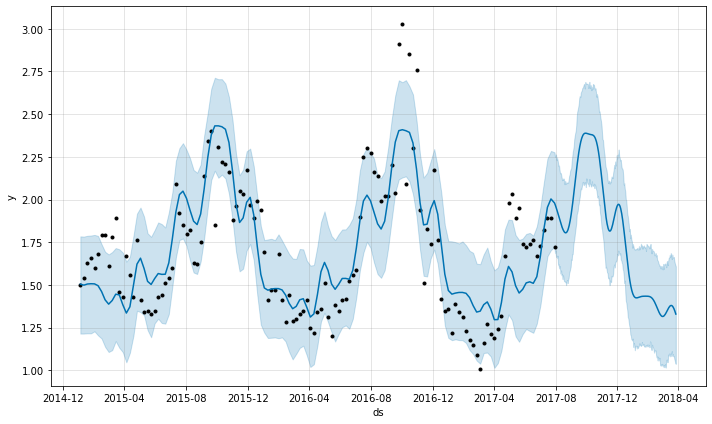

In [15]:
fig1 = m.plot(forecast)

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


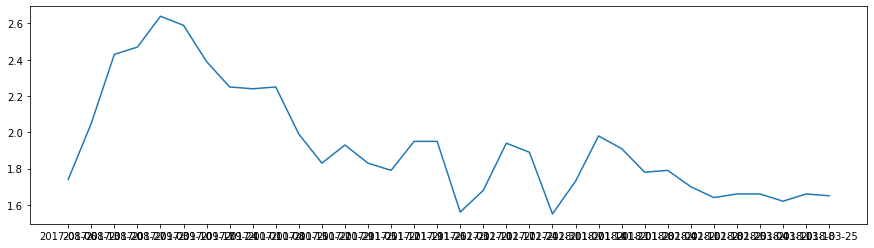

In [62]:
plt.figure(figsize=(15,4))
plt.plot(test_price['ds'], test_price['y'])
plt.show()

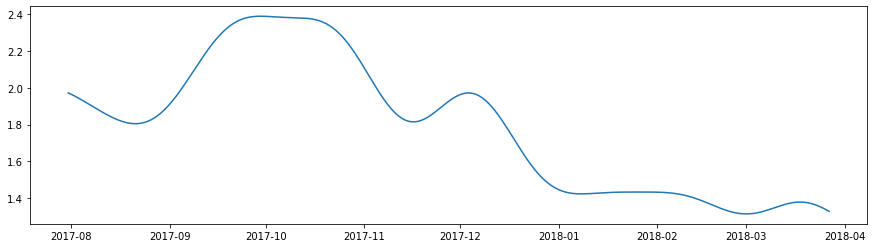

In [53]:
plt.figure(figsize=(15,4))
forecast_future = forecast.iloc[135:,:]
plt.plot(forecast_future['ds'], forecast_future['yhat'])
plt.show()